# 텍스트 인식

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 이미지 출력 함수 정의

In [2]:
def showImage(str):
    
    cv2.imshow('My Image', str)
    
    cv2.waitKey(5000) # 5초간 키 입력 대기
    cv2.destroyAllWindows() # 모든 창 닫기

    cv2.waitKey(1); cv2.waitKey(1); cv2.waitKey(1); cv2.waitKey(1) # Windows 운영체제에서는 생략

## 원본 이미지 확인

In [3]:
img_original = cv2.imread('Data/text.png')
showImage(img_original)

## 이미지를 흑백으로 변환

In [4]:
img_original = cv2.imread('Data/text.png')
img = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
showImage(img)

## 이미지의 색상 분포 확인
* 흑백 이미지는 0 ~ 255 범위의 색상값 데이터로 표현됨
* 이미지의 색상 분포를 0 ~ 255 범위의 히스토그램으로 나타내어 임계값을 결정
* 임계값을 기준으로 배경과 텍스트(그림) 구분
* 임계값보다 색상값이 작은 부분은 배경으로 판단
* 임계값보다 색상값이 큰 부분은 텍스트 또는 그림으로 판단

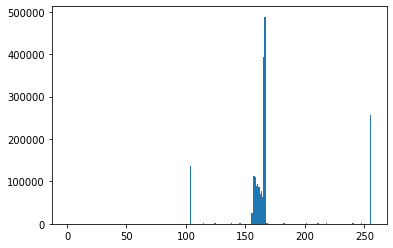

In [6]:
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

## 임계값을 기준으로 이미지 색상 이진화
* 색상값이 임계값보다 큰 부분은 백색으로 표현
* 색상값이 임계값보다 작은 부분은 흑색으로 표현
* Dilation 기법을 이용해 텍스트 주변을 백색으로 처리(텍스트 팽창)
* Erode 기법을 적용하면 텍스트 테두리를 흑색으로 처리(텍스트 침식)

https://bkshin.tistory.com/entry/OpenCV-19-%EB%AA%A8%ED%8F%B4%EB%A1%9C%EC%A7%80Morphology-%EC%97%B0%EC%82%B0-%EC%B9%A8%EC%8B%9D-%ED%8C%BD%EC%B0%BD-%EC%97%B4%EB%A6%BC-%EB%8B%AB%ED%9E%98-%EA%B7%B8%EB%A0%88%EB%94%94%EC%96%B8%ED%8A%B8-%ED%83%91%ED%96%87-%EB%B8%94%EB%9E%99%ED%96%87

In [12]:
_, thresh = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)   # 첫번째 리턴값(threshold)은 무의미(사용 X)

kernel = np.ones((5, 5), np.uint8)   # 커널 크기 및 자료형 지정
# print(kernel)

dilation = cv2.dilate(thresh, kernel, iterations = 2)   # Dilation(팽창), Erode(침식), iterations는 연산 반복 횟수

showImage(dilation)

## 백색 픽셀들을 한 덩어리로 결합(생략 가능)
Morph Close 기법 사용

In [9]:
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)   # Morph Close

showImage(closing)

## 백색 픽셀 영역 추출
Contour 추출 기법 사용

In [10]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, 3)

# 원본 이미지 위에 텍스트 영역을 붉은 테두리로 처리
img_contour = cv2.drawContours(img_original, contours, -1, (0, 0, 255), 5)
# 타겟 이미지, 컨투어, 컨투어 인덱스, 컨투어 라인의 색상, 컨투어 라인의 두께
showImage(img_contour)